# Introduction
Ce notebook présente une exploration des données clients dans le but de réaliser une segmentation basée sur les comportements d'achat. À travers diverses analyses, nous examinerons les caractéristiques clés des clients telles que la récence, la fréquence d’achat, et les montants dépensés.

L'objectif de cette analyse exploratoire est de poser les bases pour un modèle de clustering qui permettra de segmenter efficacement les clients. Cette segmentation visera à soutenir des initiatives stratégiques en marketing en fournissant des insights précieux sur les différentes typologies de clientèle. Les étapes présentées incluent le nettoyage des données, la visualisation de tendances et la préparation des variables pour les étapes ultérieures de modélisation.

In [1]:
# Importer les bibliothèques nécessaires pour le traitement
# des données et la visualisation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importer le fichier CSV contenant les données clients
df = pd.read_csv('extract.csv')

# Afficher les premières lignes du DataFrame pour vérifier
# l'importation des données
df.head()

,customer_unique_id,recency,frequency,total_spent,avg_review_score,product_variety,order_purchase_timestamp,payment_methods
0,0000366f3b9a7992bf8c76cfdf3221e2,160.273507,1,141.90,5.0,1,2018-05-10 10:56:27,credit_card
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163.263090,1,27.19,4.0,1,2018-05-07 11:11:27,credit_card
2,0000f46a3911fa3c0805444483337064,585.850868,1,86.22,3.0,1,2017-03-10 21:05:03,credit_card
3,0000f6ccb0745a6a4b88665a16c9f078,369.875428,1,43.62,4.0,1,2017-10-12 20:29:41,credit_card
4,0004aac84e0df4da2b147fca70cf8255,336.905972,1,196.89,5.0,1,2017-11-14 19:45:42,credit_card


# Exploration des données

## Répartition des clients en fonction de leur fréquence d'achat

Cette visualisation montre la répartition des clients selon le nombre de commandes qu'ils ont passées. Cela permet d'identifier la proportion de clients fidèles, ceux qui reviennent fréquemment pour effectuer plusieurs achats.

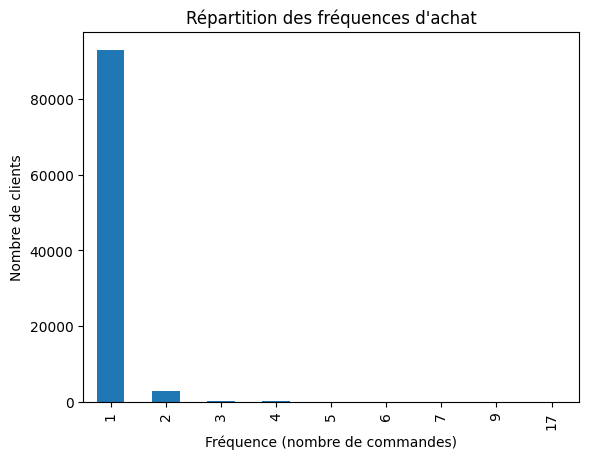

In [3]:
# Visualiser la répartition des fréquences d'achat
# (nombre de commandes par client)
df['frequency'].value_counts().plot(kind='bar')

# Ajouter les labels et le titre pour clarifier la signification du graphique
plt.title('Répartition des fréquences d\'achat')
plt.xlabel('Fréquence (nombre de commandes)')
plt.ylabel('Nombre de clients')

# Afficher le graphique
plt.show()                                    # Afficher le graphique

## Répartition des fréquences d'achat (échelle logarithmique)

Nous utilisons ici une échelle logarithmique pour visualiser la répartition des fréquences d'achat des clients. L'échelle logarithmique permet de mieux représenter la distribution des fréquences lorsque certaines valeurs (comme les clients qui commandent fréquemment) sont beaucoup moins nombreuses que d'autres.

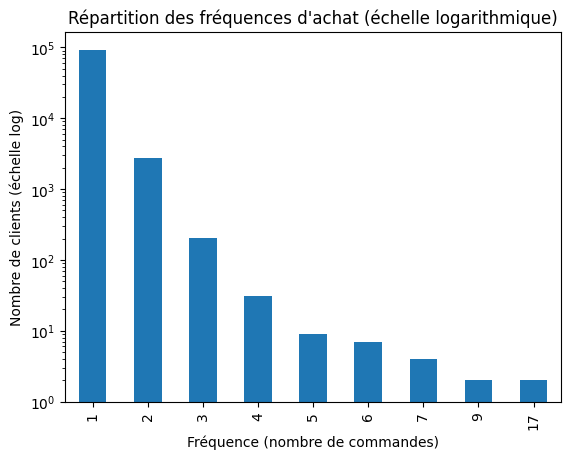

In [4]:
# Visualiser la répartition des fréquences d'achat avec
# une échelle logarithmique
df['frequency'].value_counts().plot(kind='bar', log=True)

# Ajouter un titre et des labels, en précisant l'utilisation
# de l'échelle logarithmique
plt.title(
    'Répartition des fréquences d\'achat (échelle logarithmique)'
)
plt.xlabel('Fréquence (nombre de commandes)')
plt.ylabel('Nombre de clients (échelle log)')

# Afficher le graphique
plt.show()

## Dépense moyenne en fonction de la fréquence d'achat

Cette visualisation montre la relation entre la fréquence d'achat des clients et le montant moyen qu'ils dépensent. Cela nous permet d'identifier si les clients qui achètent fréquemment dépensent plus que ceux qui achètent moins souvent.

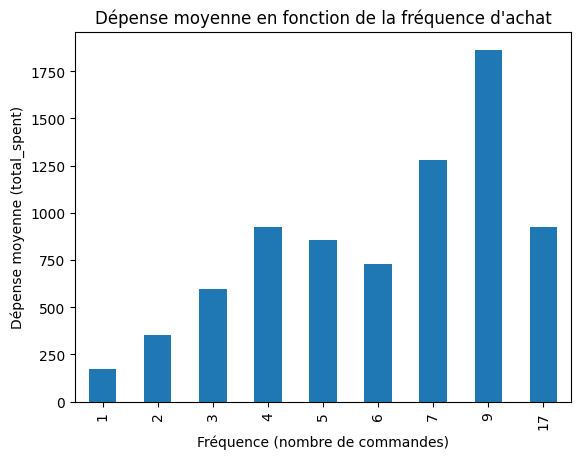

In [5]:
# Visualiser la dépense moyenne en fonction de la fréquence d'achat
df.groupby('frequency')['total_spent'].mean().plot(kind='bar')

# Ajouter un titre et des labels pour clarifier la signification du graphique
plt.title('Dépense moyenne en fonction de la fréquence d\'achat')
plt.xlabel('Fréquence (nombre de commandes)')
plt.ylabel('Dépense moyenne (total_spent)')

# Afficher le graphique
plt.show()

## Récence moyenne en fonction de la fréquence d'achat

Cette visualisation montre la relation entre la fréquence d'achat des clients et la récence moyenne (le temps écoulé depuis leur dernière commande). Cela permet de comprendre si les clients qui achètent fréquemment reviennent plus souvent ou s'il y a un délai important entre leurs achats.

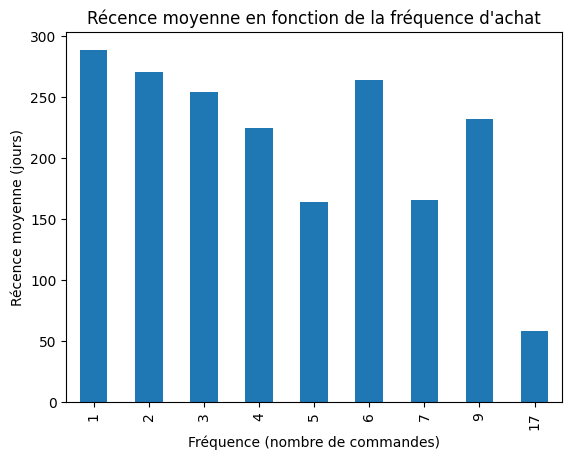

In [6]:
# Visualiser la récence moyenne en fonction de la fréquence d'achat
df.groupby('frequency')['recency'].mean().plot(kind='bar')

# Ajouter un titre et des labels pour clarifier la signification du graphique
plt.title('Récence moyenne en fonction de la fréquence d\'achat')
plt.xlabel('Fréquence (nombre de commandes)')
plt.ylabel('Récence moyenne (jours)')

# Afficher le graphique
plt.show()

## Diversité des produits en fonction de la fréquence d'achat

Cette visualisation permet d'observer la relation entre la fréquence d'achat et la diversité des produits achetés par les clients. Cela nous aide à comprendre si les clients qui commandent fréquemment ont tendance à acheter une plus grande variété de produits.

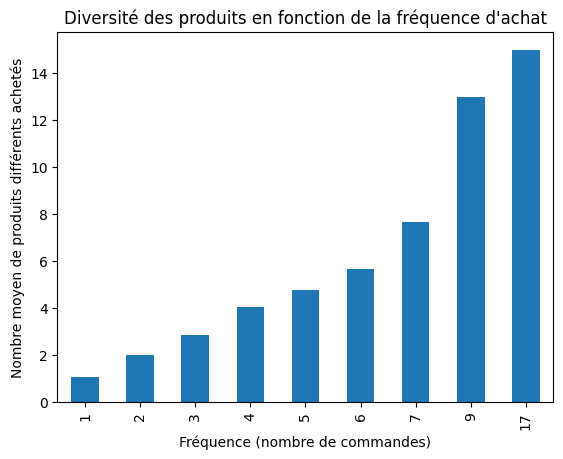

In [7]:
# Visualiser la diversité des produits en fonction de la fréquence d'achat
df.groupby('frequency')['product_variety'].mean().plot(kind='bar')

# Ajouter un titre et des labels pour clarifier la signification du graphique
plt.title('Diversité des produits en fonction de la fréquence d\'achat')
plt.xlabel('Fréquence (nombre de commandes)')
plt.ylabel('Nombre moyen de produits différents achetés')

# Afficher le graphique
plt.show()

## Modes de paiement en fonction de la fréquence d'achat

Cette visualisation empilée montre la distribution des modes de paiement utilisés par les clients en fonction de la fréquence de leurs commandes. Cela permet de comprendre quels modes de paiement sont les plus populaires pour les clients qui achètent fréquemment ou moins fréquemment.

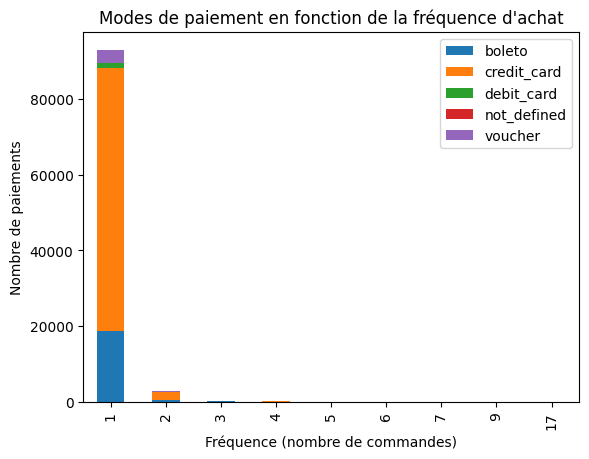

In [8]:
# Créer un graphique empilé pour visualiser les modes de paiement
# par fréquence d'achat
# Les modes de paiement sont représentés en colonnes séparées (dummies)
# avec la fonction get_dummies()
df['payment_methods'].str.get_dummies(',').groupby(
    df['frequency']).sum().plot(kind='bar', stacked=True)

# Ajouter un titre et des labels pour clarifier la signification du graphique
plt.title(
    'Modes de paiement en fonction de la fréquence d\'achat'
)
plt.xlabel('Fréquence (nombre de commandes)')
plt.ylabel('Nombre de paiements')

# Afficher le graphique
plt.show()

## Modes de paiement en fonction de la fréquence d'achat (échelle logarithmique)

Cette visualisation montre la répartition des modes de paiement en fonction de la fréquence d'achat, mais cette fois-ci en utilisant une échelle logarithmique. Cela permet de mieux observer la distribution lorsque certaines fréquences de paiement sont beaucoup plus rares ou beaucoup plus fréquentes.

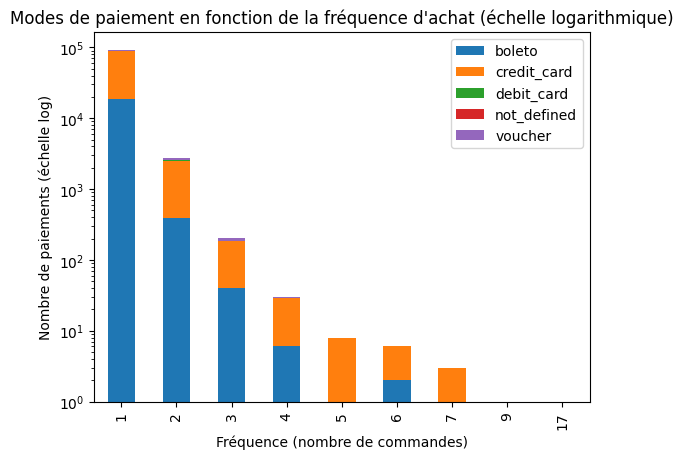

In [9]:
# Visualiser les modes de paiement par fréquence d'achat en utilisant
# une échelle logarithmique
df['payment_methods'].str.get_dummies(',').groupby(
    df['frequency']).sum().plot(kind='bar', stacked=True, log=True)

# Ajouter un titre et des labels pour clarifier la signification du graphique
plt.title(
    'Modes de paiement en fonction de la fréquence d\'achat '
    '(échelle logarithmique)'
)
plt.xlabel('Fréquence (nombre de commandes)')
plt.ylabel('Nombre de paiements (échelle log)')

# Afficher le graphique
plt.show()

In [10]:
# Comptabiliser chaque mode de paiement pour obtenir la fréquence totale
df['payment_methods'].value_counts()

payment_methods
credit_card    71868
boleto         19039
voucher         3676
debit_card      1509
not_defined        3
Name: count, dtype: int64

In [11]:
# Afficher la répartition des modes de paiement en fonction de la fréquence d'achat
df_payment_distribution = df.groupby('frequency')['payment_methods'].value_counts()
print(df_payment_distribution)

frequency  payment_methods
1          credit_card        69566
           boleto             18600
           voucher             3481
           debit_card          1449
           not_defined            2
2          credit_card         2120
           boleto               390
           voucher              175
           debit_card            59
           not_defined            1
3          credit_card          143
           boleto                40
           voucher               19
           debit_card             1
4          credit_card           23
           boleto                 6
           voucher                1
5          credit_card            8
6          credit_card            4
           boleto                 2
7          credit_card            2
           boleto                 1
9          credit_card            1
17         credit_card            1
Name: count, dtype: int64


## Proportion des modes de paiement en fonction de la fréquence d'achat

Cette visualisation montre la proportion des différents modes de paiement utilisés par les clients en fonction de la fréquence d'achat. Chaque barre empilée représente la proportion relative de chaque mode de paiement pour une fréquence d'achat donnée.

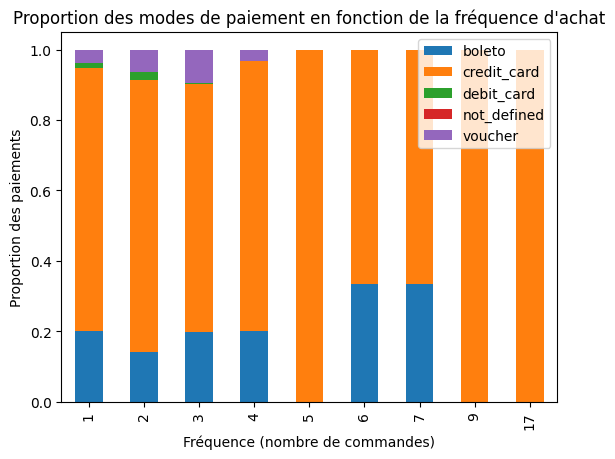

In [12]:
# Visualiser la proportion des modes de paiement par fréquence d'achat
# Chaque mode de paiement est divisé
# par le total pour représenter les proportions
df['payment_methods'].str.get_dummies(',').groupby(df['frequency']).sum() \
    .apply(lambda x: x / x.sum(), axis=1) \
    .plot(kind='bar', stacked=True)

# Ajouter un titre et des labels pour clarifier la signification du graphique
plt.title(
    'Proportion des modes de paiement en fonction de la fréquence d\'achat'
)
plt.xlabel('Fréquence (nombre de commandes)')
plt.ylabel('Proportion des paiements')

# Afficher le graphique
plt.show()

## Note moyenne en fonction de la fréquence d'achat

Cette visualisation montre la relation entre la fréquence d'achat et la note moyenne des reviews laissées par les clients. Cela permet d'observer si les clients qui achètent plus souvent laissent des avis plus positifs ou plus négatifs.

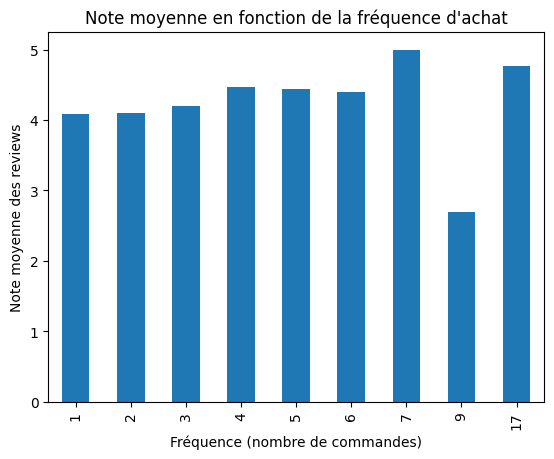

In [13]:
# Visualiser la note moyenne des reviews en fonction de la fréquence d'achat
df.groupby('frequency')['avg_review_score'].mean().plot(kind='bar')

# Ajouter un titre et des labels pour clarifier la signification du graphique
plt.title('Note moyenne en fonction de la fréquence d\'achat')
plt.xlabel('Fréquence (nombre de commandes)')
plt.ylabel('Note moyenne des reviews')

# Afficher le graphique
plt.show()

## Corrélation entre la récence et le total dépensé

Ce graphique en nuage de points permet de visualiser la corrélation entre la récence (le nombre de jours depuis la dernière commande) et le montant total dépensé par les clients. Il permet d'observer s'il y a un lien entre le temps écoulé depuis la dernière commande et les dépenses des clients.

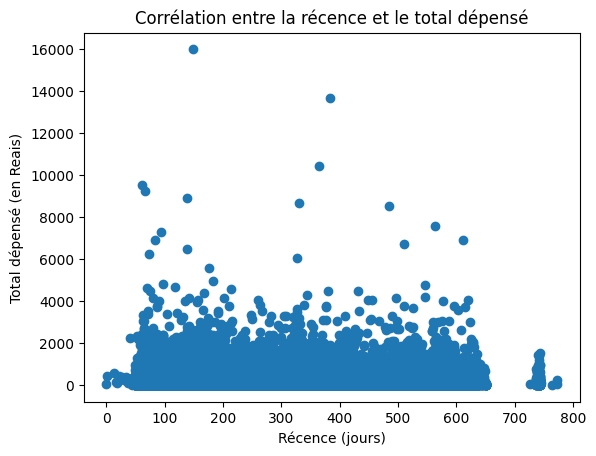

In [14]:
# Visualiser la corrélation entre la récence et le total dépensé
# Le scatter plot permet de voir s'il existe une relation
# entre ces deux variables
plt.scatter(df['recency'], df['total_spent'])

# Ajouter un titre et des labels pour clarifier la signification du graphique
plt.title('Corrélation entre la récence et le total dépensé')
plt.xlabel('Récence (jours)')
plt.ylabel('Total dépensé (en Reais)')

# Afficher le graphique
plt.show()

# Nettoyage des données

## Vérification des valeurs manquantes

Dans cette section, nous vérifions les colonnes du DataFrame qui contiennent des valeurs manquantes. Cela nous permet de mieux comprendre quelles colonnes nécessitent une attention particulière lors du nettoyage des données.

In [15]:
# Vérifier les valeurs manquantes dans chaque colonne
# isnull().sum() permet de compter le nombre de valeurs manquantes par colonne
missing_values = df.isnull().sum()

# Sélectionner uniquement les colonnes qui ont des valeurs manquantes
missing_columns = missing_values[missing_values > 0]

# Afficher les colonnes avec des valeurs manquantes
print(missing_columns)

total_spent           1
avg_review_score    716
payment_methods       1
dtype: int64


## Traitement des valeurs manquantes

In [16]:
# Afficher la ligne qui contient un NaN dans la colonne 'total_spent'
nan_total_spent = df[df['total_spent'].isnull()]

# Afficher la ligne complète pour voir les autres valeurs
print(nan_total_spent)

                     customer_unique_id     recency  frequency  total_spent  \
49312  830d5b7aaa3b6f1e9ad63703bec97d23  762.217824          1          NaN   

       avg_review_score  product_variety order_purchase_timestamp  \
49312               1.0                1      2016-09-15 12:16:38   

      payment_methods  
49312             NaN  


In [17]:
# Comparer le client avec les autres sur la fréquence et la récence
client_info = df[
    df['customer_unique_id'] == '830d5b7aaa3b6f1e9ad63703bec97d23'
]

# Moyenne de 'total_spent', 'recency', et 'frequency' des autres clients
mean_total_spent = df['total_spent'].mean()
mean_recency = df['recency'].mean()
mean_frequency = df['frequency'].mean()

# Afficher les informations du client par rapport aux moyennes
print(
    f"Client ID: {client_info['customer_unique_id'].values[0]}"
)
print(
    f"Recency du client: {client_info['recency'].values[0]}, "
    f"Moyenne Recency: {mean_recency}"
)
print(
    f"Fréquence du client: {client_info['frequency'].values[0]}, "
    f"Moyenne Fréquence: {mean_frequency}"
)
print(
    f"Avis moyen du client: {client_info['avg_review_score'].values[0]}"
)

Client ID: 830d5b7aaa3b6f1e9ad63703bec97d23
Recency du client: 762.217824073974, Moyenne Recency: 288.20136972389673
Fréquence du client: 1, Moyenne Fréquence: 1.0348089410589412
Avis moyen du client: 1.0


In [18]:
# Supprimer la ligne de ce client
df.drop(
    df[df['customer_unique_id'] == '830d5b7aaa3b6f1e9ad63703bec97d23'].index,
    inplace=True
)

Nous avons identifié une ligne avec des valeurs manquantes dans les colonnes `total_spent` et `payment_methods`. Après analyse, nous avons observé que ce client n'a passé qu'une seule commande il y a plus de 762 jours (bien au-delà de la récence moyenne de 288 jours), et a laissé un avis de 1.0, reflétant une insatisfaction. Compte tenu de son inactivité et de son faible engagement, nous avons décidé de supprimer cette ligne afin de ne pas biaiser l'analyse de segmentation avec des données non pertinentes.

In [19]:
# Remplir 'avg_review_score' par la moyenne des notes des reviews
df['avg_review_score'] = df['avg_review_score'].fillna(
    df['avg_review_score'].mean()
)

Dans cette étape, nous avons remarqué que certaines lignes dans la colonne `avg_review_score` contenaient des valeurs manquantes. Afin de ne pas perdre ces données lors de l'analyse, nous avons choisi de remplir ces valeurs manquantes par la moyenne des notes des reviews existantes.

L'avantage de cette méthode est qu'elle permet de conserver l'intégralité du jeu de données sans introduire de biais. En effet, les clients qui n'ont pas laissé de review ne doivent pas être exclus de l'analyse, car ils sont toujours pertinents pour la segmentation. Remplacer ces valeurs par la moyenne garantit une cohérence dans le traitement des données, tout en évitant de fausser les résultats en introduisant une valeur arbitraire.

Cette approche est particulièrement utile dans le cadre d'une analyse de segmentation, où nous cherchons à maximiser l'information disponible pour chaque client.

## Vérification des types de données

Nous vérifions ici les types de données dans le DataFrame pour nous assurer que chaque colonne est bien typée et prête pour la suite du traitement. Cela nous permet de voir si certaines colonnes nécessitent une conversion ou un traitement supplémentaire.

In [20]:
# Vérifier les types de données dans le DataFrame
print(df.dtypes)

customer_unique_id           object
recency                     float64
frequency                     int64
total_spent                 float64
avg_review_score            float64
product_variety               int64
order_purchase_timestamp     object
payment_methods              object
dtype: object


## Encodage des colonnes catégorielles

Nous encodons la colonne `payment_methods` avec des variables binaires (one-hot encoding) pour rendre les données catégorielles compatibles avec les modèles d'analyse.

In [21]:
# Encodage de la colonne 'payment_methods' en variables binaires
df = pd.get_dummies(df, columns=['payment_methods'])

## Visualisation des outliers pour total_spent

Cette visualisation à l'aide d'un boxplot permet de repérer les éventuels outliers dans la colonne `total_spent`. Cela nous aide à comprendre si certains clients ont dépensé des montants extrêmement élevés par rapport à la majorité des autres clients.

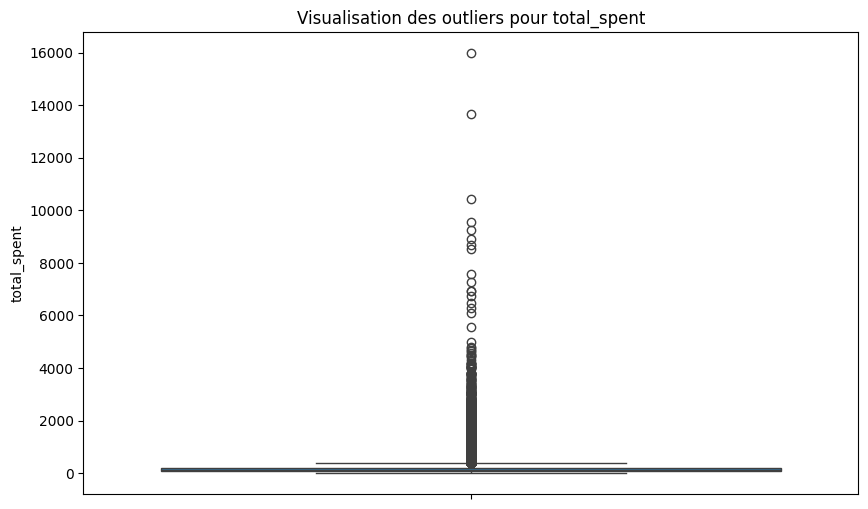

In [22]:
# Visualiser les outliers pour la variable 'total_spent' à l'aide d'un boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(df['total_spent'])

# Ajouter un titre pour clarifier la signification du graphique
plt.title('Visualisation des outliers pour total_spent')

# Afficher le graphique
plt.show()

Nous avons visualisé les outliers dans la colonnes total_spent, à l'aide d'un boxplot. Cela nous a permis de mieux comprendre la distribution des données, et nous avons décidé de conserver les outliers. Ces valeurs extrêmes représentent potentiellement des clients ayant des comportements spécifiques, comme de gros dépensiers ou des clients VIP, ce qui peut être précieux pour la segmentation et l'analyse future.

# Sauvegarde du DataFrame final

Nous sauvegardons le DataFrame final avec toutes les transformations et les nouvelles features créées. Ce fichier CSV pourra être utilisé pour la prochaine étape de l'analyse ou du modèle de segmentation.

In [23]:
# Sauvegarder le DataFrame final avec seulement les features sélectionnées
df.to_csv('prepared_customer_data.csv', index=False)